In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class Config:
    path = "./ACCKB/"

In [8]:
consumers = pd.read_excel(Config.path + "consumers.xlsx")
consumers.head(10)

,Bâtiment,Activé,Boucle,Adresse,Code Postal,Commune,Lat,Long,Source,Point de livraison,...,Type de compteur,Fournisseur de complément,Type de contrat,Plages temporelles,Utilisation,Puissance souscrite HPH (kVA),Puissance souscrite HCH (kVA),Puissance souscrite HPB (kVA),Puissance souscrite HCB (kVA),Puissance de raccordement (kVA)
0,Bureaux Services techniques,True,Unique,32 Rue Marcel Sanguy,22110,Rostrenen,48.243159,-3.321233,ALEX,30001450879251,...,PMEI,Total energies 2026,C5,1,CU,37,37,37,37,42
1,Maison de l'enfance,True,Unique,Rue Chateaubriant,22110,Rostrenen,48.237008,-3.312463,ALEX,30001451109890,...,PMEI,Total energies 2026,C5,1,CU,72,72,72,72,72
2,Abattoir intercommunal,True,Unique,Rue Rosa Le Hénaff,22110,Rostrenen,48.232861,-3.321286,ALEX,30001450601856,...,PMEI,EDF,C4,4,CU,78,78,78,78,78
3,EKOPOL,True,Unique,ZA La Garenne,22110,Rostrenen,48.250702,-3.305307,ALEX,14581620753018,...,LNK,Total energies 2026,C5,1,CU,18,18,18,18,36
4,Déchèterie (1),True,Unique,Route de Saint-Brieuc,22110,Rostrenen,48.248550,-3.302459,ALEX,14597684492401,...,LNK,Total energies 2026,C5,1,CU,36,36,36,36,36
5,Poste de refoulement,True,Unique,ZA Kerjean,22110,Rostrenen,48.246267,-3.310622,ALEX,50024096820332,...,PMEI,Total energies 2026,C5,1,LU,6,6,6,6,36
6,SMKB,True,Unique,2 Rue Gustave Launay,22480,Saint-Nicolas-du-Pélem,48.312213,-3.162739,ALEX,14505643960682,...,LNK,Total energies 2026,C5,2,MU,18,18,18,18,36
7,Déchèterie (2),True,Unique,Rue Parc Ronce,22480,Saint-Nicolas-du-Pélem,48.308464,-3.155702,ALEX,14520549851252,...,LNK,Total energies 2026,C5,1,CU,6,6,6,6,36
8,ALSH (St Nicolas du Pélem),True,Unique,Rue de Rostrenen,22480,Saint-Nicolas-du-Pélem,48.309723,-3.178579,ALEX,14570911638604,...,LNK,Total energies 2026,C5,2,MU,36,36,36,36,36
9,ALSH (Glomel),True,Unique,Étang du Corong,22110,Glomel,48.218982,-3.392874,ALEX,14533429732023,...,LNK,Total energies 2026,C5,1,CU,18,18,18,18,36


In [18]:
#list all columns
consumers.columns


Index(['Bâtiment', 'Activé', 'Boucle', 'Adresse', 'Code Postal', 'Commune',
       'Lat', 'Long', 'Source', 'Point de livraison', 'Priorité', 'Nombre',
       'Type de compteur', 'Fournisseur de complément', 'Type de contrat',
       'Plages temporelles', 'Utilisation', 'Puissance souscrite HPH (kVA)',
       'Puissance souscrite HCH (kVA)', 'Puissance souscrite HPB (kVA)',
       'Puissance souscrite HCB (kVA)', 'Puissance de raccordement (kVA)'],
      dtype='object')

* Bâtiment: consommateur bâtiment
* Activé: Actif consommateur
* Boucle: une fois ou boucle?
* Adresse: ✅
* Code Postal: ✅
* Commune: ✅
* Lat: Latitude
* Long : ✅
* Source : ✅
* Point de livraison : ✅
* Priorité : ✅
* Nombre : ?
* Type de compteur : ?
* Fournisseur de complément: ?
* Type de contrat : ?
* Plages temporelles: ✅
* Utilisation: ?
* Puissance souscrite HPH (kVA): ✅
* Puissance souscrite HCH (kVA): ✅
* Puissance souscrite HPB (kVA): ✅
* Puissance souscrite HCB (kVA): ✅
* Puissance de raccordement (kVA): ✅

In [16]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# 1. Clean Data (Using your specific column names)
consumers_clean = consumers.copy()

# Ensure numeric data
consumers_clean['Lat'] = pd.to_numeric(consumers_clean['Lat'], errors='coerce')
consumers_clean['Long'] = pd.to_numeric(consumers_clean['Long'], errors='coerce')

# Drop NaNs
consumers_clean = consumers_clean.dropna(subset=['Lat', 'Long'])

# Filter valid coordinates
consumers_clean = consumers_clean[
    (consumers_clean['Lat'].between(-90, 90)) &
    (consumers_clean['Long'].between(-180, 180))
]

if consumers_clean.empty:
    print("Error: No valid coordinate data found.")
else:
    # 2. Create the Map
    center_lat = consumers_clean['Lat'].mean()
    center_lon = consumers_clean['Long'].mean()

    # CHANGE 1: Use 'CartoDB positron'. It is cleaner and faster for data viz.
    m = folium.Map(location=[center_lat, center_lon], zoom_start=9, tiles='CartoDB positron')

    # Create the cluster group for the pin markers
    marker_cluster = MarkerCluster(name="Markers").add_to(m)

    # CHANGE 2: Create a FeatureGroup for the circles. 
    # This keeps them separate from the map base, preventing rendering crashes.
    circle_group = folium.FeatureGroup(name="20km Radius Circles")

    radius_meters = 20 * 1000

    # 3. Add Markers and Circles
    # PERFORMANCE NOTE: If you have >1000 rows, this loop might still be heavy. 
    # Try consumers_clean.head(100) to test if the map appears.
    for lat, lon, c_id in zip(consumers_clean['Lat'], consumers_clean['Long'], consumers_clean['Bâtiment']):
        
        # Add Marker to Cluster
        folium.Marker(
            location=[lat, lon],
            popup=f"ID: {c_id}",
            icon=folium.Icon(color="blue", icon="user", prefix='fa')
        ).add_to(marker_cluster)

        # Add Circle to the specialized Group (NOT directly to 'm')
        folium.Circle(
            location=[lat, lon],
            radius=radius_meters,
            color='red',
            weight=1,           # Thinner lines reduce visual clutter
            fill=True,
            fill_color='red',
            fill_opacity=0.05,  # Lower opacity helps when circles overlap
            popup=f"Radius: {c_id}"
        ).add_to(circle_group)

    # Add the circle group to the map
    circle_group.add_to(m)

    # CHANGE 3: Add Layer Control
    # This adds a button to the top-right to turn circles on/off
    folium.LayerControl().add_to(m)

    # 4. Display
    display(m)

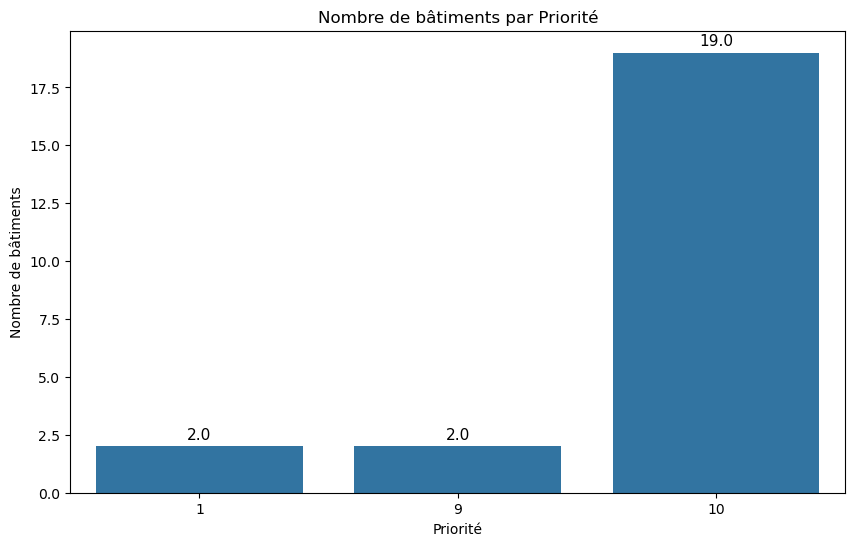

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'consumers'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Priorité', data=consumers)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Nombre de bâtiments par Priorité')
plt.xlabel('Priorité')
plt.ylabel('Nombre de bâtiments')
plt.show()


## Questions: 

1. In the dataset, under folder consumers:
    - What are the files 1.csv, 2.csv, 3.csv (they do not have identifiers)

    - The file from_acckb.csv has the identifiers and the values match with the individual identifier files but the dates are different. par example: value for column "30001450879251" from **from_acckb.csv** is same with the value of the file "30001450879251.csv". How should we handle/process this?

    - What is the file "FranceENEDISRsidentieltarifunique6kVA.csv?", "base nautique ems 2024.csv" et "Grappe photovoltaique - ACCKB_v2.csv"


In [10]:
#import (ACC_data/consumers/14501012966710.csv)
import pandas as pd
case_1 = pd.read_csv('ACC_data/consumers/14501012966710.csv', sep=',')
case_1.head(10)


,datetime,W
0,2022-12-31T23:00:00Z,730.0
1,2023-01-01T00:00:00Z,730.0
2,2023-01-01T01:00:00Z,1480.0
3,2023-01-01T02:00:00Z,600.0
4,2023-01-01T03:00:00Z,740.0
5,2023-01-01T04:00:00Z,630.0
6,2023-01-01T05:00:00Z,730.0
7,2023-01-01T06:00:00Z,1410.0
8,2023-01-01T07:00:00Z,710.0
9,2023-01-01T08:00:00Z,720.0


In [3]:
case_1.isnull().sum()

datetime    1
W           1
dtype: int64

In [8]:
case_2 = pd.read_csv("ACC_data/consumers/14505643960682.csv", sep=";")
case_2.head()

,datetime,W
0,2022-12-31T23:00:00Z,5880
1,2023-01-01T00:00:00Z,5880
2,2023-01-01T01:00:00Z,5930
3,2023-01-01T02:00:00Z,6230
4,2023-01-01T03:00:00Z,6350


In [16]:
case_1.isnull().sum()

datetime    1
W           1
dtype: int64

In [13]:
case_3 = pd.read_csv("ACC_data/consumers/14520549851252.csv", sep=";")
case_3.head()

,datetime,W
0,2022-12-31T23:00:00Z,720
1,2023-01-01T00:00:00Z,720
2,2023-01-01T01:00:00Z,770
3,2023-01-01T02:00:00Z,720
4,2023-01-01T03:00:00Z,750


In [32]:
import os

# 1. Where is Python looking?
print(f"Current Working Directory: {os.getcwd()}")

# 2. What files are actually there?
print("\nFiles in this folder:")
files = os.listdir('.')
for f in files:
    print(f" - {f}")

# 3. Check specifically for your file
target = "ACC_data/consumers.xlsx"
if target in files:
    print(f"\n[SUCCESS] The file '{target}' IS here.")
else:
    print(f"\n[FAILURE] The file '{target}' is NOT here.")
    print("Likely causes: The file is in a Download folder, or it is named just 'consumers.xlsx'.")

Current Working Directory: /Users/sushantpokharel/Desktop/Deuxieme Sem/PROCOM/Easy_ACC

Files in this folder:
 - functions.py
 - Data_exploration.ipynb
 - .DS_Store
 - definition_scenario.py
 - requirements.txt
 - uv.lock
 - pyproject.toml
 - __pycache__
 - README.md
 - env
 - ACC_data
 - .gitignore
 - .python-version
 - .git

[FAILURE] The file 'ACC_data/consumers.xlsx' is NOT here.
Likely causes: The file is in a Download folder, or it is named just 'consumers.xlsx'.


In [33]:
import pandas as pd
import glob
import os

# --- CONFIGURATION ---
DATA_FOLDER = "ACC_data/consumers/" 
# Replace with your actual index filename
INDEX_FILE = "ACC_data/consumers.xlsx" 

def load_and_merge_data(folder_path, index_file):
    # 0. Check if Index file exists
    if not os.path.exists(index_file):
        print(f"[ERROR] Index file not found: {index_file}")
        print("Please check the filename and path in CONFIGURATION.")
        return pd.DataFrame()

    # 1. Load the Index
    print(f"Loading index file: {index_file}...")
    try:
        # Auto-detect if it's Excel or CSV
        if index_file.endswith('.xlsx') or index_file.endswith('.xls'):
            index_df = pd.read_excel(index_file, dtype={'Point de livraison': str})
        else:
            # Assume CSV
            index_df = pd.read_csv(index_file, dtype={'Point de livraison': str})
        
        # Clean column names (strip whitespace) just in case
        index_df.columns = index_df.columns.str.strip()

        # Check if the required column exists
        if 'Point de livraison' not in index_df.columns:
            print(f"[ERROR] Column 'Point de livraison' not found in index.")
            print(f"Available columns: {list(index_df.columns)}")
            return pd.DataFrame()

        valid_ids = set(index_df['Point de livraison'].dropna())
        print(f"[SUCCESS] Index loaded. Found {len(valid_ids)} valid consumers.")
        
    except Exception as e:
        print(f"[CRITICAL ERROR] Could not read index file: {e}")
        return pd.DataFrame() # Returns empty table instead of None to prevent crash

    all_data_frames = []
    
    # 2. Find all CSV files in the folder
    files = glob.glob(os.path.join(folder_path, "*.csv"))
    print(f"Found {len(files)} CSV files in folder.")
    
    for file_path in files:
        file_name = os.path.basename(file_path)
        
        # Skip the index file itself
        if file_name == index_file:
            continue
            
        # Extract ID (filename without extension)
        consumer_id = os.path.splitext(file_name)[0]
        
        if consumer_id in valid_ids:
            try:
                # 3. Smart Read (comma or semicolon)
                temp_df = pd.read_csv(file_path, sep=None, engine='python')
                
                # 4. Normalize Columns
                rename_map = {
                    'Horodate': 'datetime', 
                    'Valeur': 'W',
                    'Date de début': 'datetime'
                }
                temp_df = temp_df.rename(columns=rename_map)
                
                if 'datetime' in temp_df.columns and 'W' in temp_df.columns:
                    temp_df = temp_df[['datetime', 'W']]
                    temp_df['consumer_id'] = consumer_id
                    all_data_frames.append(temp_df)
                    print(f"[OK] Imported: {file_name}")
                else:
                    print(f"[SKIP] {file_name}: Columns 'datetime'/'W' not found.")
                    
            except Exception as e:
                print(f"[ERROR] Reading {file_name}: {e}")
        else:
            # Optional: Uncomment to see skipped files
            # print(f"[IGNORE] {file_name}: ID not in Index.")
            pass

    # 5. Merge
    if all_data_frames:
        return pd.concat(all_data_frames, ignore_index=True)
    else:
        print("No matching data files found.")
        return pd.DataFrame()

# --- EXECUTION ---
final_df = load_and_merge_data(DATA_FOLDER, INDEX_FILE)

# Inspect
if not final_df.empty:
    print("\n--- Final Data Structure ---")
    print(final_df.info())
    print(final_df.head())
else:
    print("\n[RESULT] No data was loaded. Please check the errors above.")

Loading index file: ACC_data/consumers.xlsx...
[SUCCESS] Index loaded. Found 23 valid consumers.
Found 29 CSV files in folder.
[OK] Imported: 14574529662103.csv
[OK] Imported: 30001450879251.csv
[OK] Imported: 14570911638604.csv
[OK] Imported: 50073336860603135.csv
[OK] Imported: 1.csv
[OK] Imported: 14520549851252.csv
[OK] Imported: 3.csv
[OK] Imported: 14545730749855.csv
[OK] Imported: 14525180810824.csv
[OK] Imported: 50024096820332.csv
[SKIP] 14501012966710.csv: Columns 'datetime'/'W' not found.
[OK] Imported: 14551808900995.csv
[OK] Imported: 14583646839053.csv
[OK] Imported: 30001451109890.csv
[OK] Imported: 14597684492401.csv
[OK] Imported: 30001450601856.csv
[OK] Imported: 14505643960682.csv
[OK] Imported: 14581620753018.csv
[OK] Imported: 14533429732023.csv
[OK] Imported: 50055068074923.csv
[OK] Imported: 14545586032026.csv

--- Final Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175224 entries, 0 to 175223
Data columns (total 3 columns):
 #   Column    

In [34]:
final_df.head(10)

,datetime,W,consumer_id
0,2022-12-31T23:00:00Z,3270,14574529662103
1,2023-01-01T00:00:00Z,3270,14574529662103
2,2023-01-01T01:00:00Z,3300,14574529662103
3,2023-01-01T02:00:00Z,3400,14574529662103
4,2023-01-01T03:00:00Z,3410,14574529662103
5,2023-01-01T04:00:00Z,3360,14574529662103
6,2023-01-01T05:00:00Z,3410,14574529662103
7,2023-01-01T06:00:00Z,3280,14574529662103
8,2023-01-01T07:00:00Z,3310,14574529662103
9,2023-01-01T08:00:00Z,3390,14574529662103


In [37]:
final_df['consumer_id'].nunique()


20